In [1]:
%run c://Users/a/apython/__init__/Normal_for_DSS.py

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [2]:
from keras.models import load_model
from keras.utils import np_utils

In [3]:
#read all.csv and treat!!
df = pd.read_csv("C://Users/a/GitHub/ldata/fer2013/all.csv")
df.drop('Unnamed: 0', axis=1, inplace=True) # 쓸데없는 컬럼 drop
df_train = df[df.Usage == 'Training'] # Training이라고 라벨되어있는 항목만 가져오기
X_train = np.array(df_train.iloc[:, 2:]).astype('float32') / 255. # float 타입 변경, scaling
X_train = X_train.reshape(28709, 48, 48, 1) # 입력형태에 맞게 reshape
y_train = np.array(df_train.iloc[:, 0]) # y는 1차원이고 카테고리값이라 scaling 필요없음

df_test = df[df.Usage == 'PrivateTest'] # 교차검증용 테스트셋
X_test = np.array(df_test.iloc[:, 2:]).astype('float32') / 255.
X_test = X_test.reshape(3589, 48, 48, 1)
y_test = np.array(df_test.iloc[:, 0])
Y_train = np_utils.to_categorical(y_train, 7) # 원핫인코딩
Y_test = np_utils.to_categorical(y_test, 7)

#for the public tsstset
df_pubtest = df[df.Usage == "PublicTest"]
X_pubtest = np.array(df_pubtest.iloc[:,2:]).astype("float32") / 255.
X_pubtest = X_pubtest.reshape(-1,48,48,1)
y_pubtest = np.array(df_pubtest.iloc[:,0])
Y_pubtrain = np_utils.to_categorical(y_train,7)
Y_pubtest = np_utils.to_categorical(y_pubtest,7)

In [4]:
"""important!!! put your model here"""
"""important!!! put your model here"""
"""important!!! put your model here"""
"""important!!! put your model here"""
model = load_model("C:/Users/a/GitHub/ldata/team_image_testfile/2013/basic_double_chk.hdf5")

""" lower codes must be run after do model fitting!!  lower codes must be run after do model fitting!! 
 lower codes must be run after do model fitting!! lower codes must be run after do model fitting!!
  lower codes must be run after do model fitting!! lower codes must be run after do model fitting!! """

# do predict!!
pred_y = model.predict_classes(X_test)

# make dataframe and values!!
# Tr => list of true index , Fa => list of False index , Al = all index
fin = pd.DataFrame({"pred_y":pred_y,"test_y":y_test,"ind":range(len(pred_y))})
T = fin["pred_y"] == fin["test_y"]
F = fin["pred_y"] != fin["test_y"]
Tr = fin.ind[T].values
Fa = fin.ind[F].values
Al = fin.ind.values

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


3589/3589 [==============================] - 120s   


In [5]:
def result_show0():
    plt.figure(figsize=(16,16))
    
    plt.subplot(221)
    sns.barplot(fin["test_y"].value_counts().index,fin["test_y"].value_counts().values)
    plt.title("Total number of each category", size = 20)
    plt.ylabel("Num",size=20)
    plt.xlabel("Category", size = 20)
    
    plt.subplot(222)
    sns.barplot(fin["test_y"].value_counts().index, fin["test_y"].value_counts().values,alpha=0.5)
    sns.barplot(fin["test_y"].value_counts().index, fin[T]["test_y"].value_counts().values ) 
    plt.title("Prediction True number vs tot number",size=20)
    plt.xlabel("Category", size = 20)
    plt.ylabel("Num", size=20)
    
    plt.subplot(223)
    sns.barplot(fin["test_y"].value_counts().index, [1,1,1,1,1,1,1], alpha=0.5)
    sns.barplot(fin["test_y"].value_counts().index, (fin[T]["test_y"].value_counts().values)/(fin["test_y"].value_counts().values))
    plt.title("True ratio of each category", size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("ratio",size=20)
   
    plt.tight_layout()
    plt.show()
    

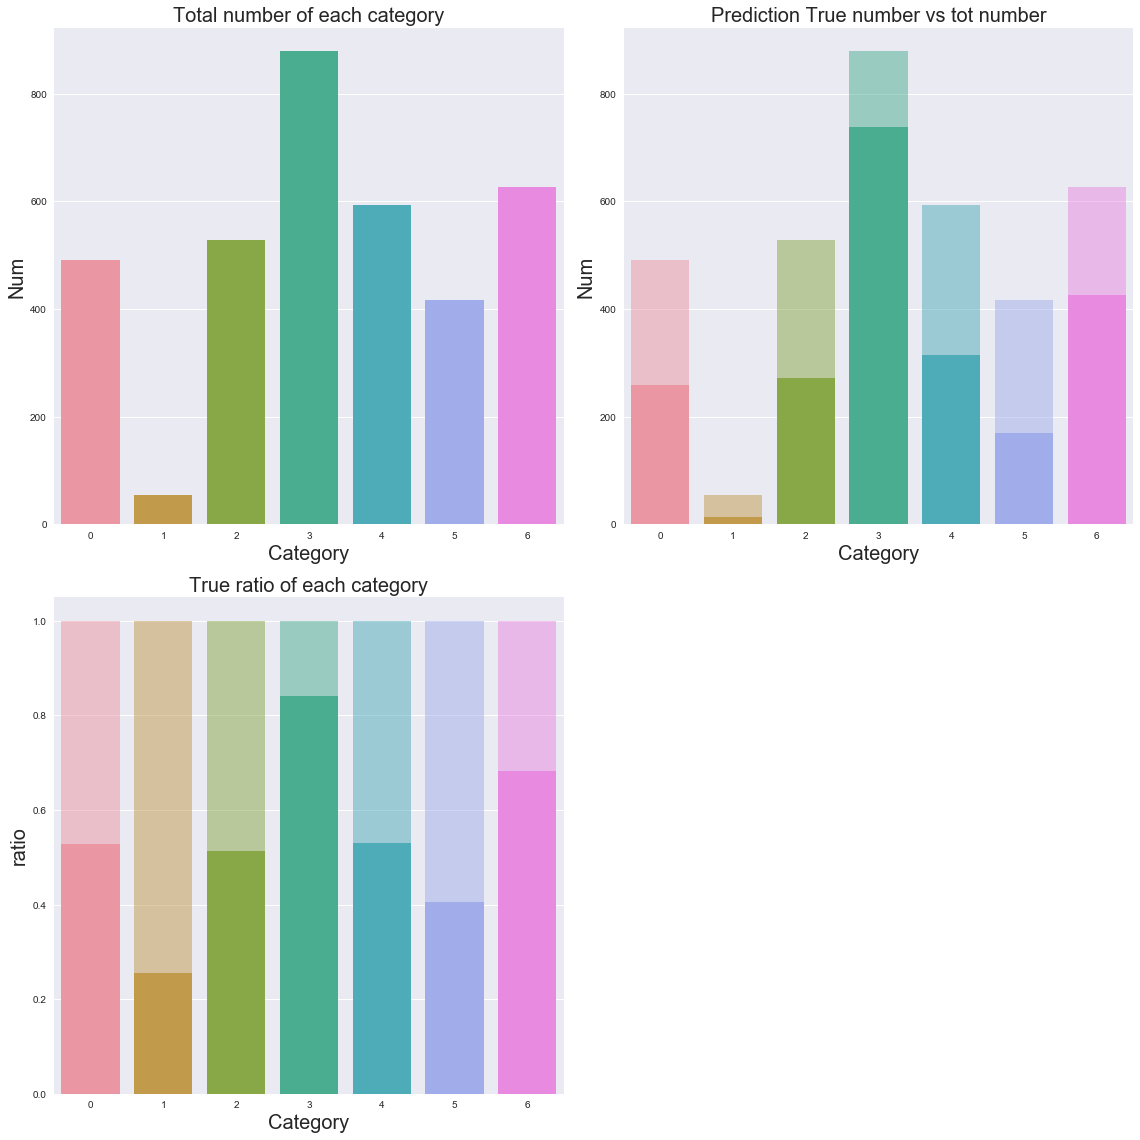

In [7]:
result_show0()

In [8]:
ac = np.array([(0.9,0.1,0),(0,1,0),(0,0,1),(1,1,0.0),(0,0.7,0.7),(0.6901,  0.2392,  0.4627),(0.6,0.6,0.6)])
ac1 = ac / 2.
ac1

array([[ 0.45   ,  0.05   ,  0.     ],
       [ 0.     ,  0.5    ,  0.     ],
       [ 0.     ,  0.     ,  0.5    ],
       [ 0.5    ,  0.5    ,  0.     ],
       [ 0.     ,  0.35   ,  0.35   ],
       [ 0.34505,  0.1196 ,  0.23135],
       [ 0.3    ,  0.3    ,  0.3    ]])

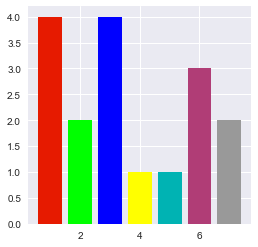

In [9]:
plt.figure(figsize = (4,4), num=1 )
plt.bar([1,2,3,4,5,6,7],[4,2,4,1,1,3,2],color=ac, )
plt.show()

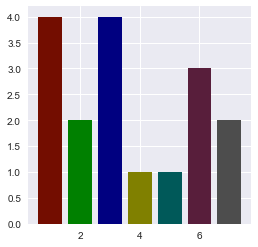

In [10]:
plt.figure(figsize = (4,4), num=1 )
plt.bar([1,2,3,4,5,6,7],[4,2,4,1,1,3,2],color=ac1, )
plt.show()